# Data Mining Assignment 1

# Introduction

### Contextualising the problem

**Data mining** is a field that focuses on extracting insights and patterns from large datasets. That as of itself already constitutes a strong argument in favour of using such a process when tackling business problems, but there is still more to it.

In this analysis, we will approach the complex market of housing. Specifically, the one in California, which has been undergoing a significant shortage ever since the 70s, later resulting in various problems during the decade of 1990. This fact is relevant since it falls under the scope of this dataset.

Therefore, it is important to mention that this data is not particularly helpful at predicting current housing prices. Nonetheless, it serves as valuable ground for emulating the tackling of a panoply of issues at the time. Looking at a small example to illustrate the stress felt at that point regarding housing, over 465.000 families in California were placed on waiting lists for public housing, and such lists could go on for up to 8 years (Williams, 2000).

As such, this project proposes to answer the following problem statement:

**Given the highly stressed Californian housing market of the 90s, how can we accurately predict the pricing of houses by utilising demographic, property, and geographical data - and what insights can the developed models provide to systematise and further advise both house buyers and sellers?**

### Expanding on the business objectives of the project (Business Understanding)

If a successful approach can be delivered, we propose that this solution:

Allowing consumers to independently input characteristics about a property to gauge its market value. This can be used by both home owner and prospective home buyers. This may particularly be interesting for people who do not wish to use a real estate agent. As they may not want to pay the fee or simply do not trust them at face value and want a second opinion.

A sample flow is shown in the diagram below:
<div style="text-align: center;">
    <img src="https://i.imgur.com/my0ettW.jpeg" alt="CRISP-DM Process" style="width:720px;height:200px;">
</div>

As mentioned before, the data we have here is from 1990. This, of course, means that it is not reflective of the current market, primarily due to data drift. Namely, today's data may not fit the same distribution of values that it did in the 90s. For example, the dollar value is not the same as it was back then and therefore cannot be used for an apples-to-apples comparison with today's values. The motivation behind this analysis is that if we find that the model is able to perform well on the old data, you could retrain the same model with up-to-date data from California housing, while keeping the same schema (avoiding schema skew), and see if that could perform to the same degree with today's market data.

To be able to judge if the model is performing well enough, we must use some evaluation metric(s), for this we will be using `RMSE` as our primary metric. This is thanks to its balance between interpretability and accuracy. It allows for expression using the same units and penalises large errors which is important for high-stakes markets such as real estate where transactions are large.

### Data Mining Methodology 

The Cross-Industry Standard Process for Data Mining (CRISP-DM) Methodology was used to build the deliverable of the assignment (it is pictured below). It organizes the data mining project in six phases (Business Understanding, Data Understanding, Data preparation, Modeling, Evaluation and Deployment).

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

`TODO: WRITE MORE BELOW!!!`

1. **Business Understanding**: This process involves understanding the project's objectives, defining the business problem, and determining the success criteria. This was already explored above.

2. **Data Understanding**: This section involves looking at the available data through methods such as exploratory data analysis (EDA) where we identify the quality of data and gain some initial insights by plotting our .

3. **Data Preparation**: This phase involves cleaning, transforming, and preparing the data for modeling. Here we can deal with issues that we identified in the data understanding stage such as missing values and outliers. Issues also can include multicolinearity.

4. **Modelling**: In this phase we tune and develop two models. We look at Linear Regression and Random Forests.

5. **Evaluation**: In this phase, the model's performance is assessed against the success criteria defined in the Business Understanding phase.

6. **Deployment**: This step is omitted.

# Data Understanding

### Importing modules

In [34]:
!pip install -r requirements.txt -q

In [35]:
import pandas as pd
import numpy as np

# Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path


# Machine Learning modules
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.decomposition import PCA

### Importing data

In [36]:
# Import the housing data from a CSV file
df = pd.read_csv('California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [37]:
# Display basic statistics
display(df.describe().transpose()) 

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


# :TODO
- Explain the descriptive statistics better, right now it is not enough

We can see that we have 20000+ rows, meaning that we have enough data to draw conclusions from.

From this we can also see that we are dealing with only numerical or  integer (Tot_Rooms & Tot_Bedrooms) variables.


In [38]:
# Rename Distance_to_LA column to Distance_to_LosAngeles for consistent naming standard
df.rename(columns={'Distance_to_LA':'Distance_to_LosAngeles'}, inplace=True) 

# Check for missing values
print(df.isna().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LosAngeles      0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


There are no missing values in the data set, therefore there is no need to replace values or remove any rows.

In [39]:
# Create list of geographical related column names
columns_geographical = df.columns[df.columns.str.contains('Distance|Latitude|Longitude')]
columns_geographical

Index(['Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LosAngeles',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'],
      dtype='object')

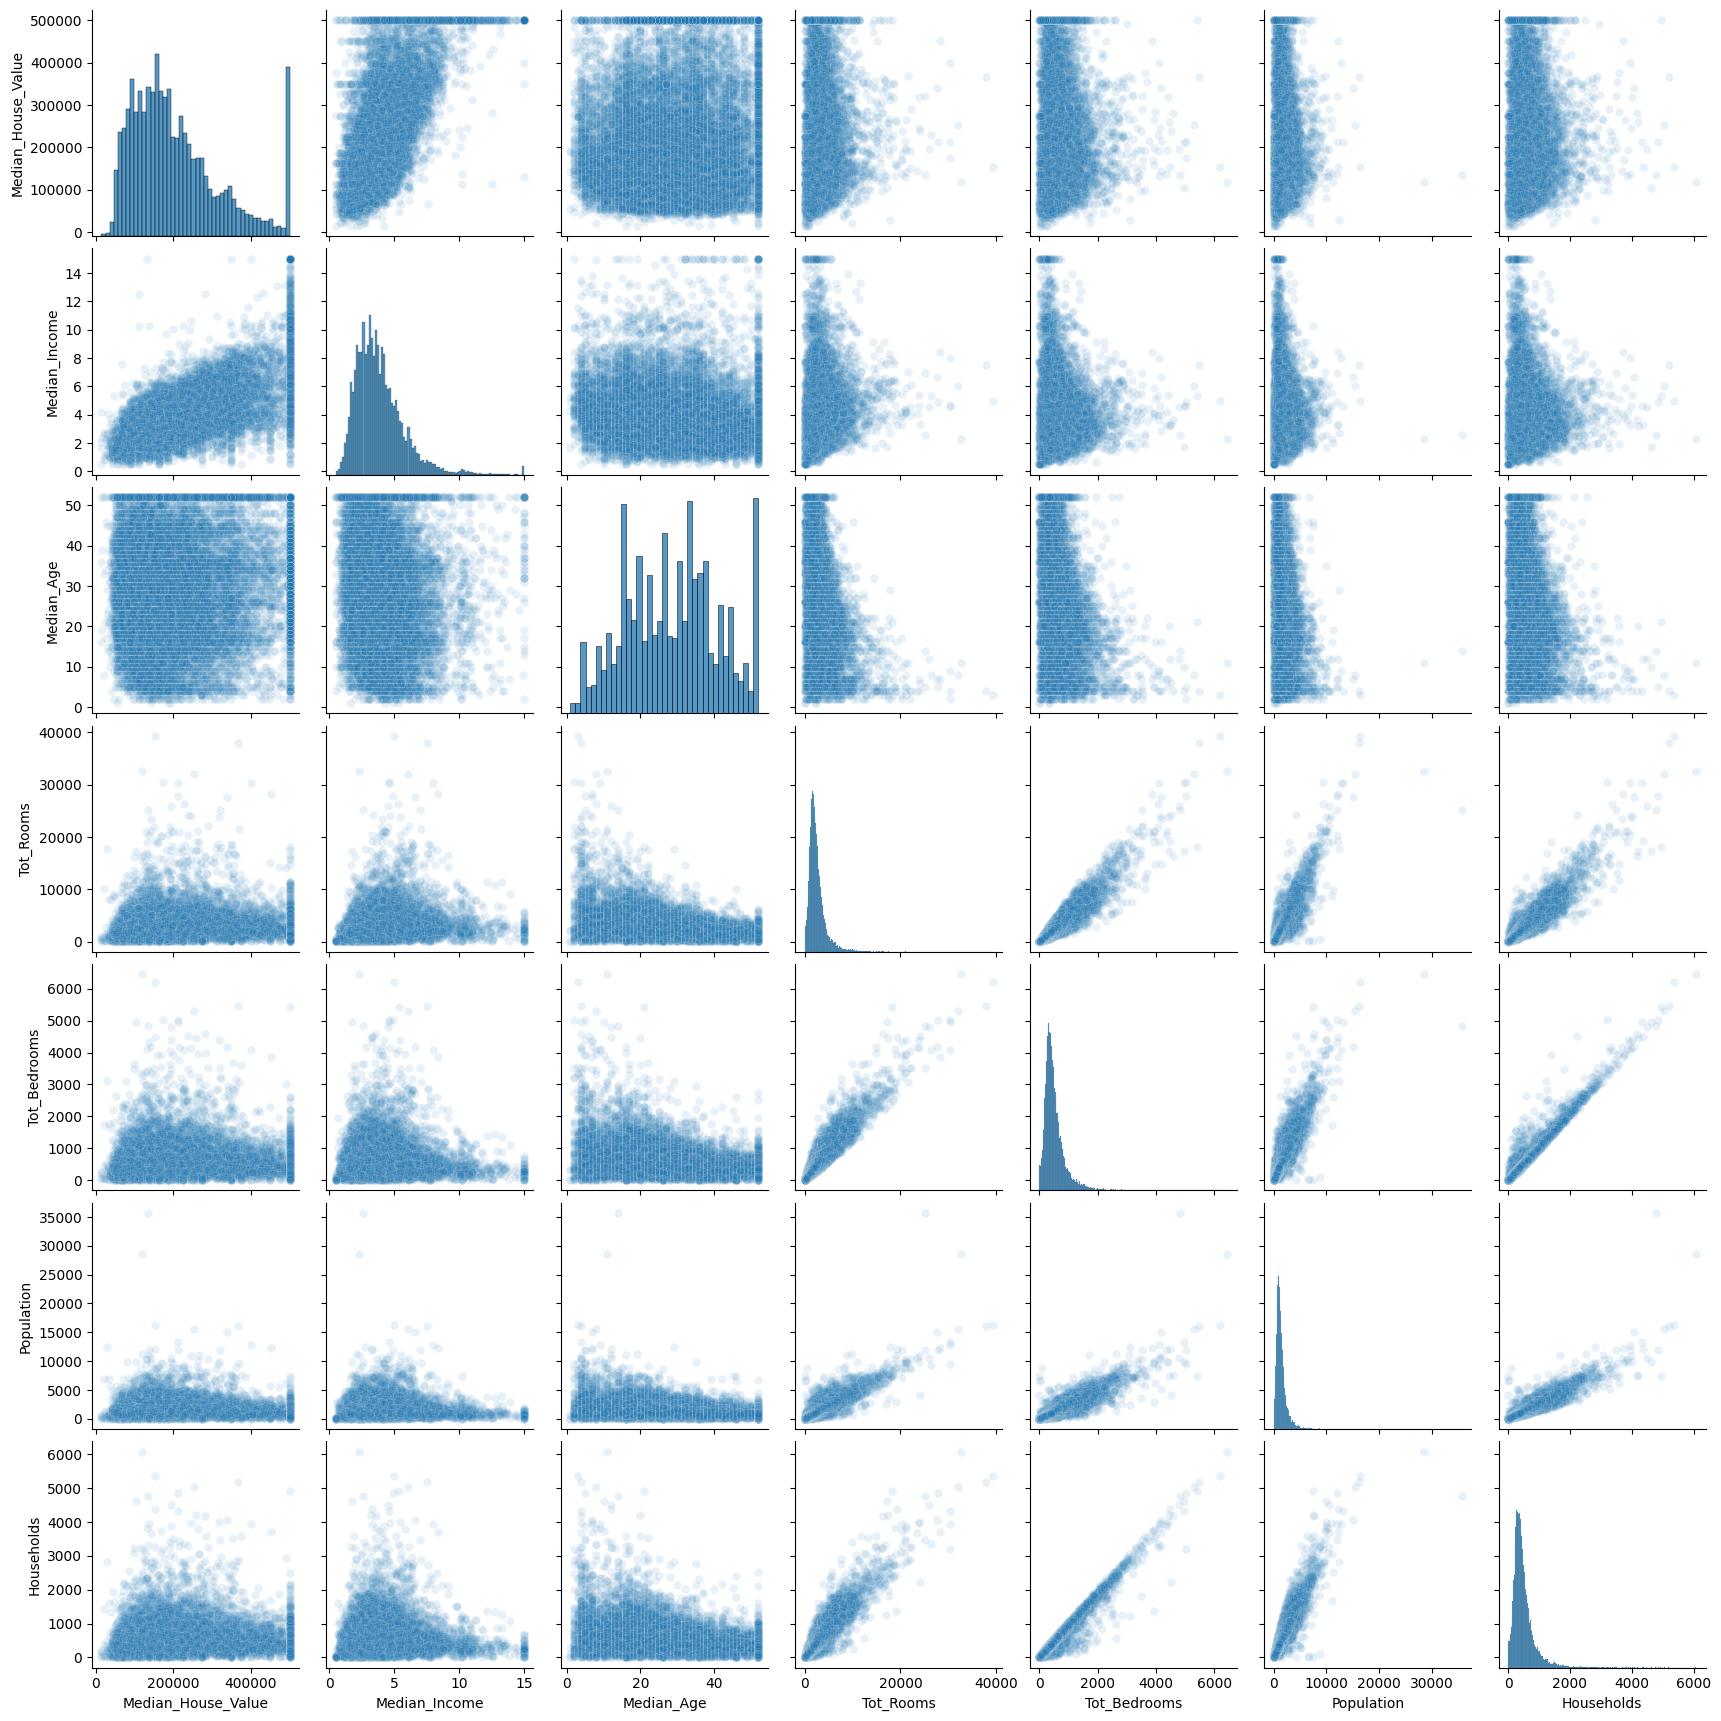

In [40]:
# Pairplot for w/o distance columns
sns.pairplot(df.drop(columns=columns_geographical), plot_kws={'alpha':0.1})  # Set opacity to 10%)
plt.show()

# :TODO
- Explain the plots, why are all these plots here? What can we learn from these plots? 

We do not plot the distance values, as it would be too clustered.

bedrooms, tot rooms and household correlated

The dist. graphs will be analyzed in a different plot

### Checking distribution

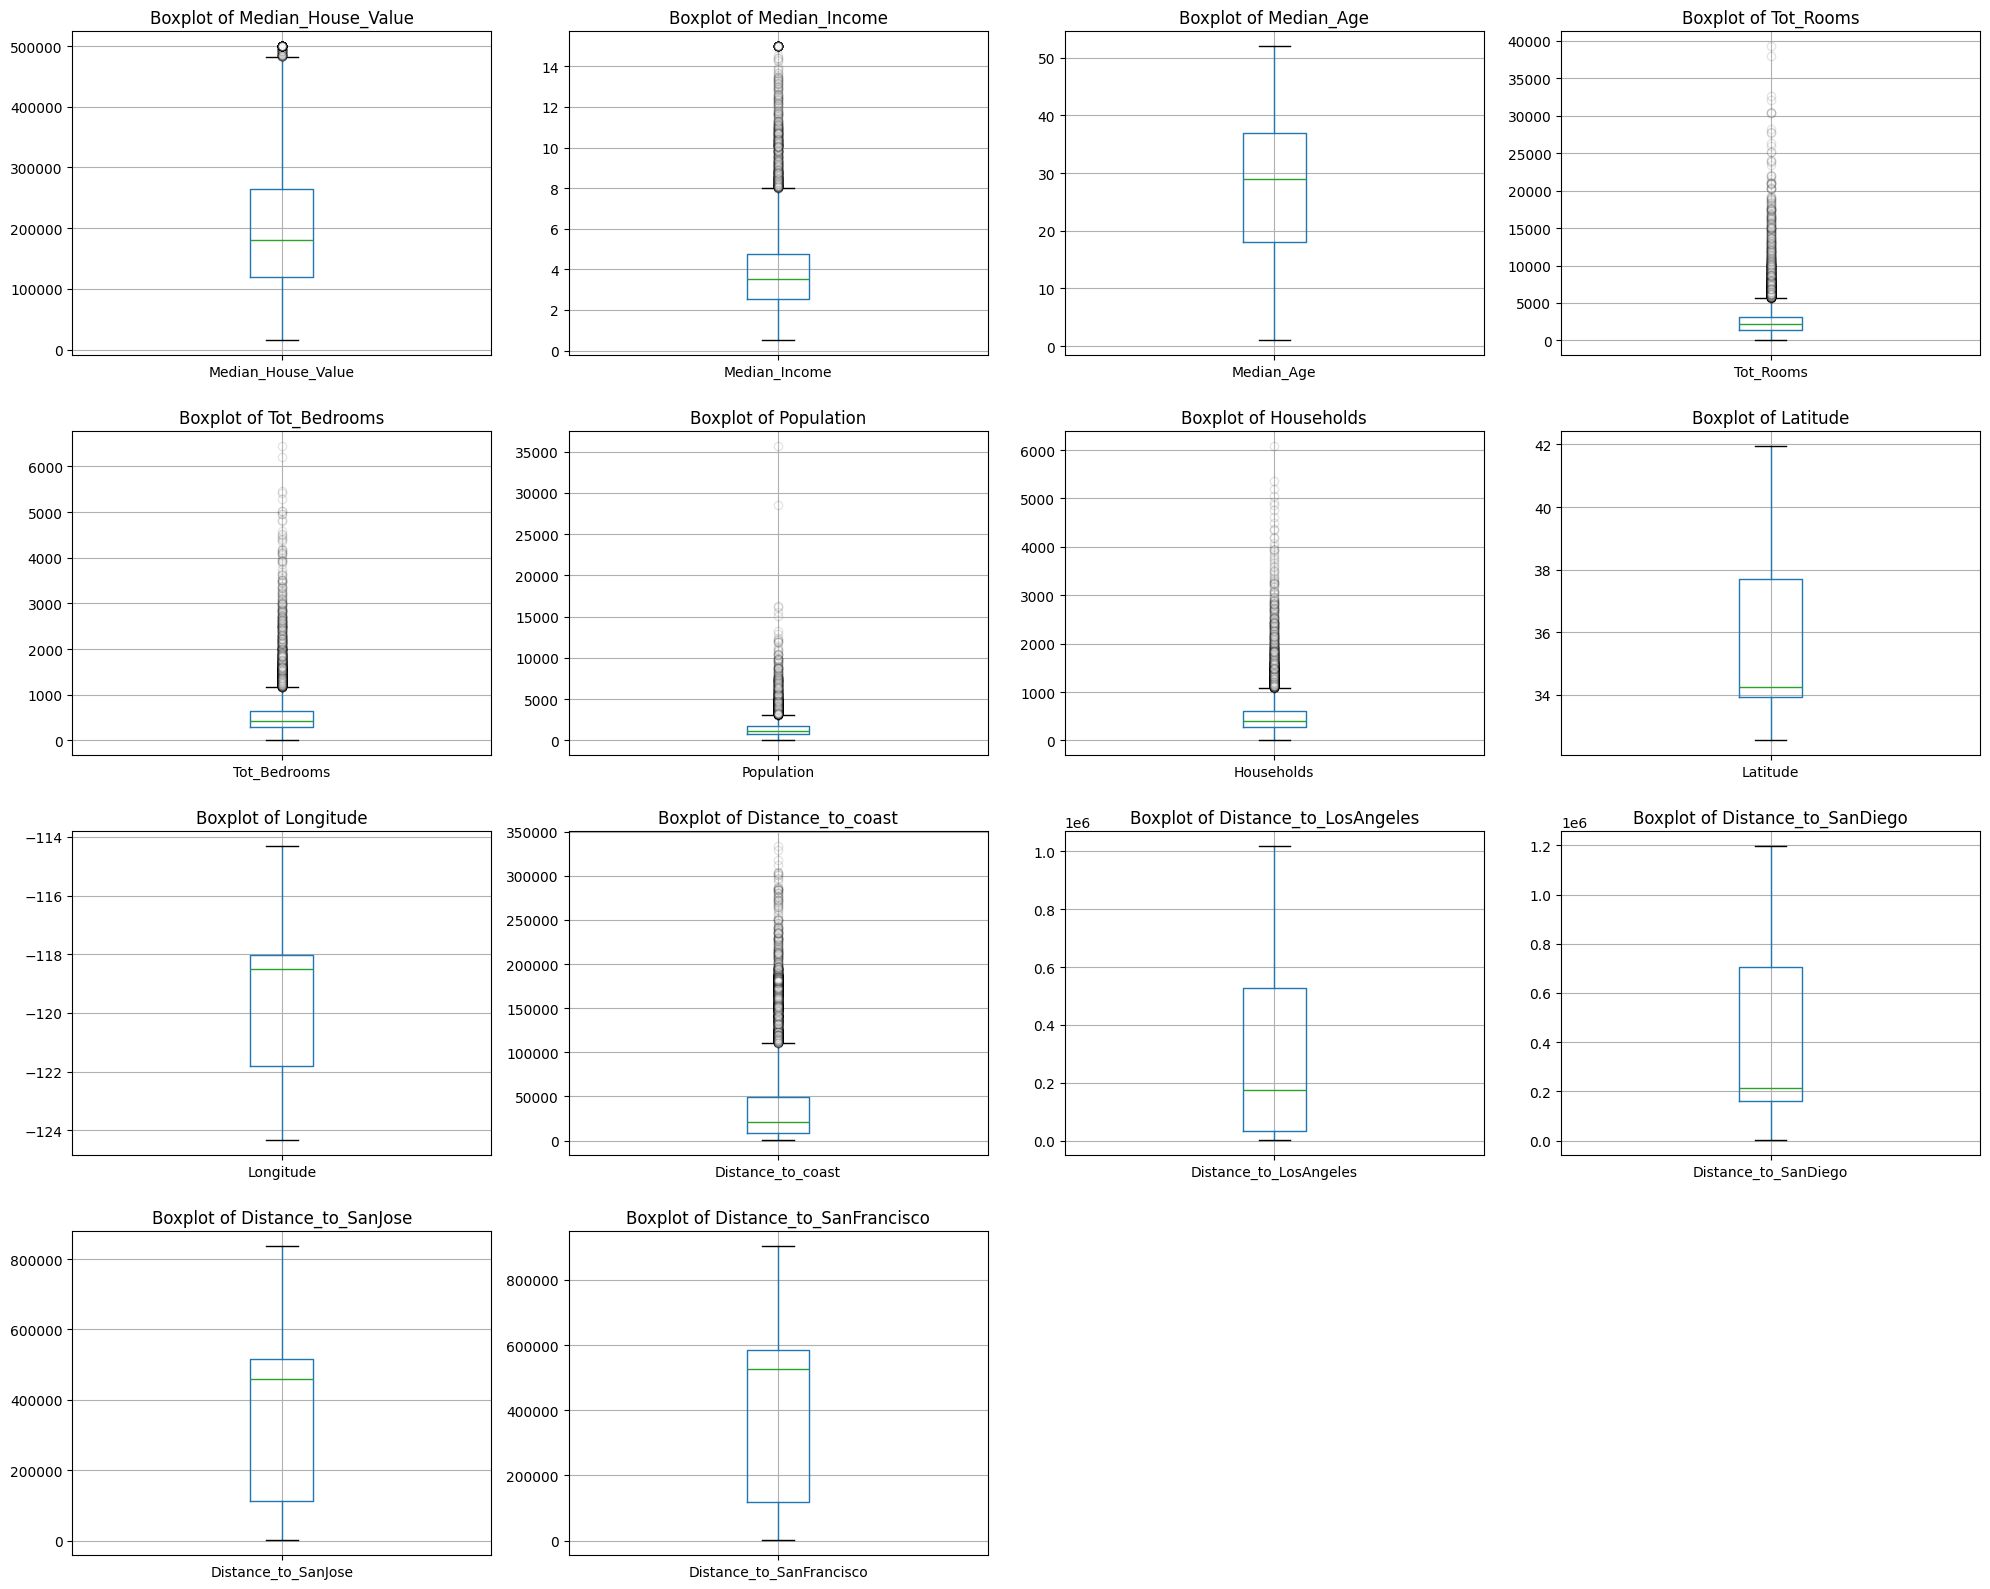

In [41]:
def boxplots():
    cols_per_row = 4
    num_rows = int(np.ceil(len(df.columns) / cols_per_row))
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
    axes = axes.flatten()
    flierprops = dict(marker='o', markerfacecolor='white', markersize=6, linestyle='none', alpha=0.1)  # Set opacity to 10%

    for index, column in enumerate(df.columns):
        ax = axes[index]
        df.boxplot(column=column, ax=ax, vert=True, flierprops=flierprops)
        ax.set_title(f'Boxplot of {column}')

    for j in range(index + 1, len(axes)):
        fig.delaxes(axes[j]) 
               
    plt.tight_layout()
    plt.show()

boxplots()

## Explanation of outliers
- median income 
    - You can see that the circle that is highest, is colored really thick. This means there are many values with the maximum income. Which is by default not possible. which means that there is a cap. Therefore it is likely that all incomes that are higher than X dollar, are aggregated by X. 

All other outliers, do not seem to  be capped at a certain number
        

### Median income & median house value explanation
As you can see from the sorted list below, there are 49 households with an income of 15,000.1. This cannot be a coincidence, so the income must be capped at 15,000.1.

Additionally, there are 965 houses with the maximum value of 500,001 dollar in the dataframe. This is also not a coincidence, meaning house values must be capped as well. Furthermore, there are 27 houses priced exactly at 500,000 dollar. The gap between the third most expensive house and the highest and second-highest house values is very small, indicating an artificial cap on prices.

In [42]:
df.groupby("Median_Income").count().sort_values(by="Median_Income", ascending=False)["Median_House_Value"].rename("Count of rows")

Median_Income
15.0001    49
15.0000     2
14.9009     1
14.5833     1
14.4219     1
           ..
0.6775      1
0.6433      1
0.5495      1
0.5360     10
0.4999     12
Name: Count of rows, Length: 12928, dtype: int64

In [43]:
df.groupby("Median_House_Value").count().sort_values(by="Median_House_Value", ascending=False)["Median_Income"].rename("Count of rows")

Median_House_Value
500001.0    965
500000.0     27
499100.0      1
499000.0      1
498800.0      1
           ... 
26600.0       1
25000.0       1
22500.0       4
17500.0       1
14999.0       4
Name: Count of rows, Length: 3842, dtype: int64

### Visualizing the distribution of the numerical values

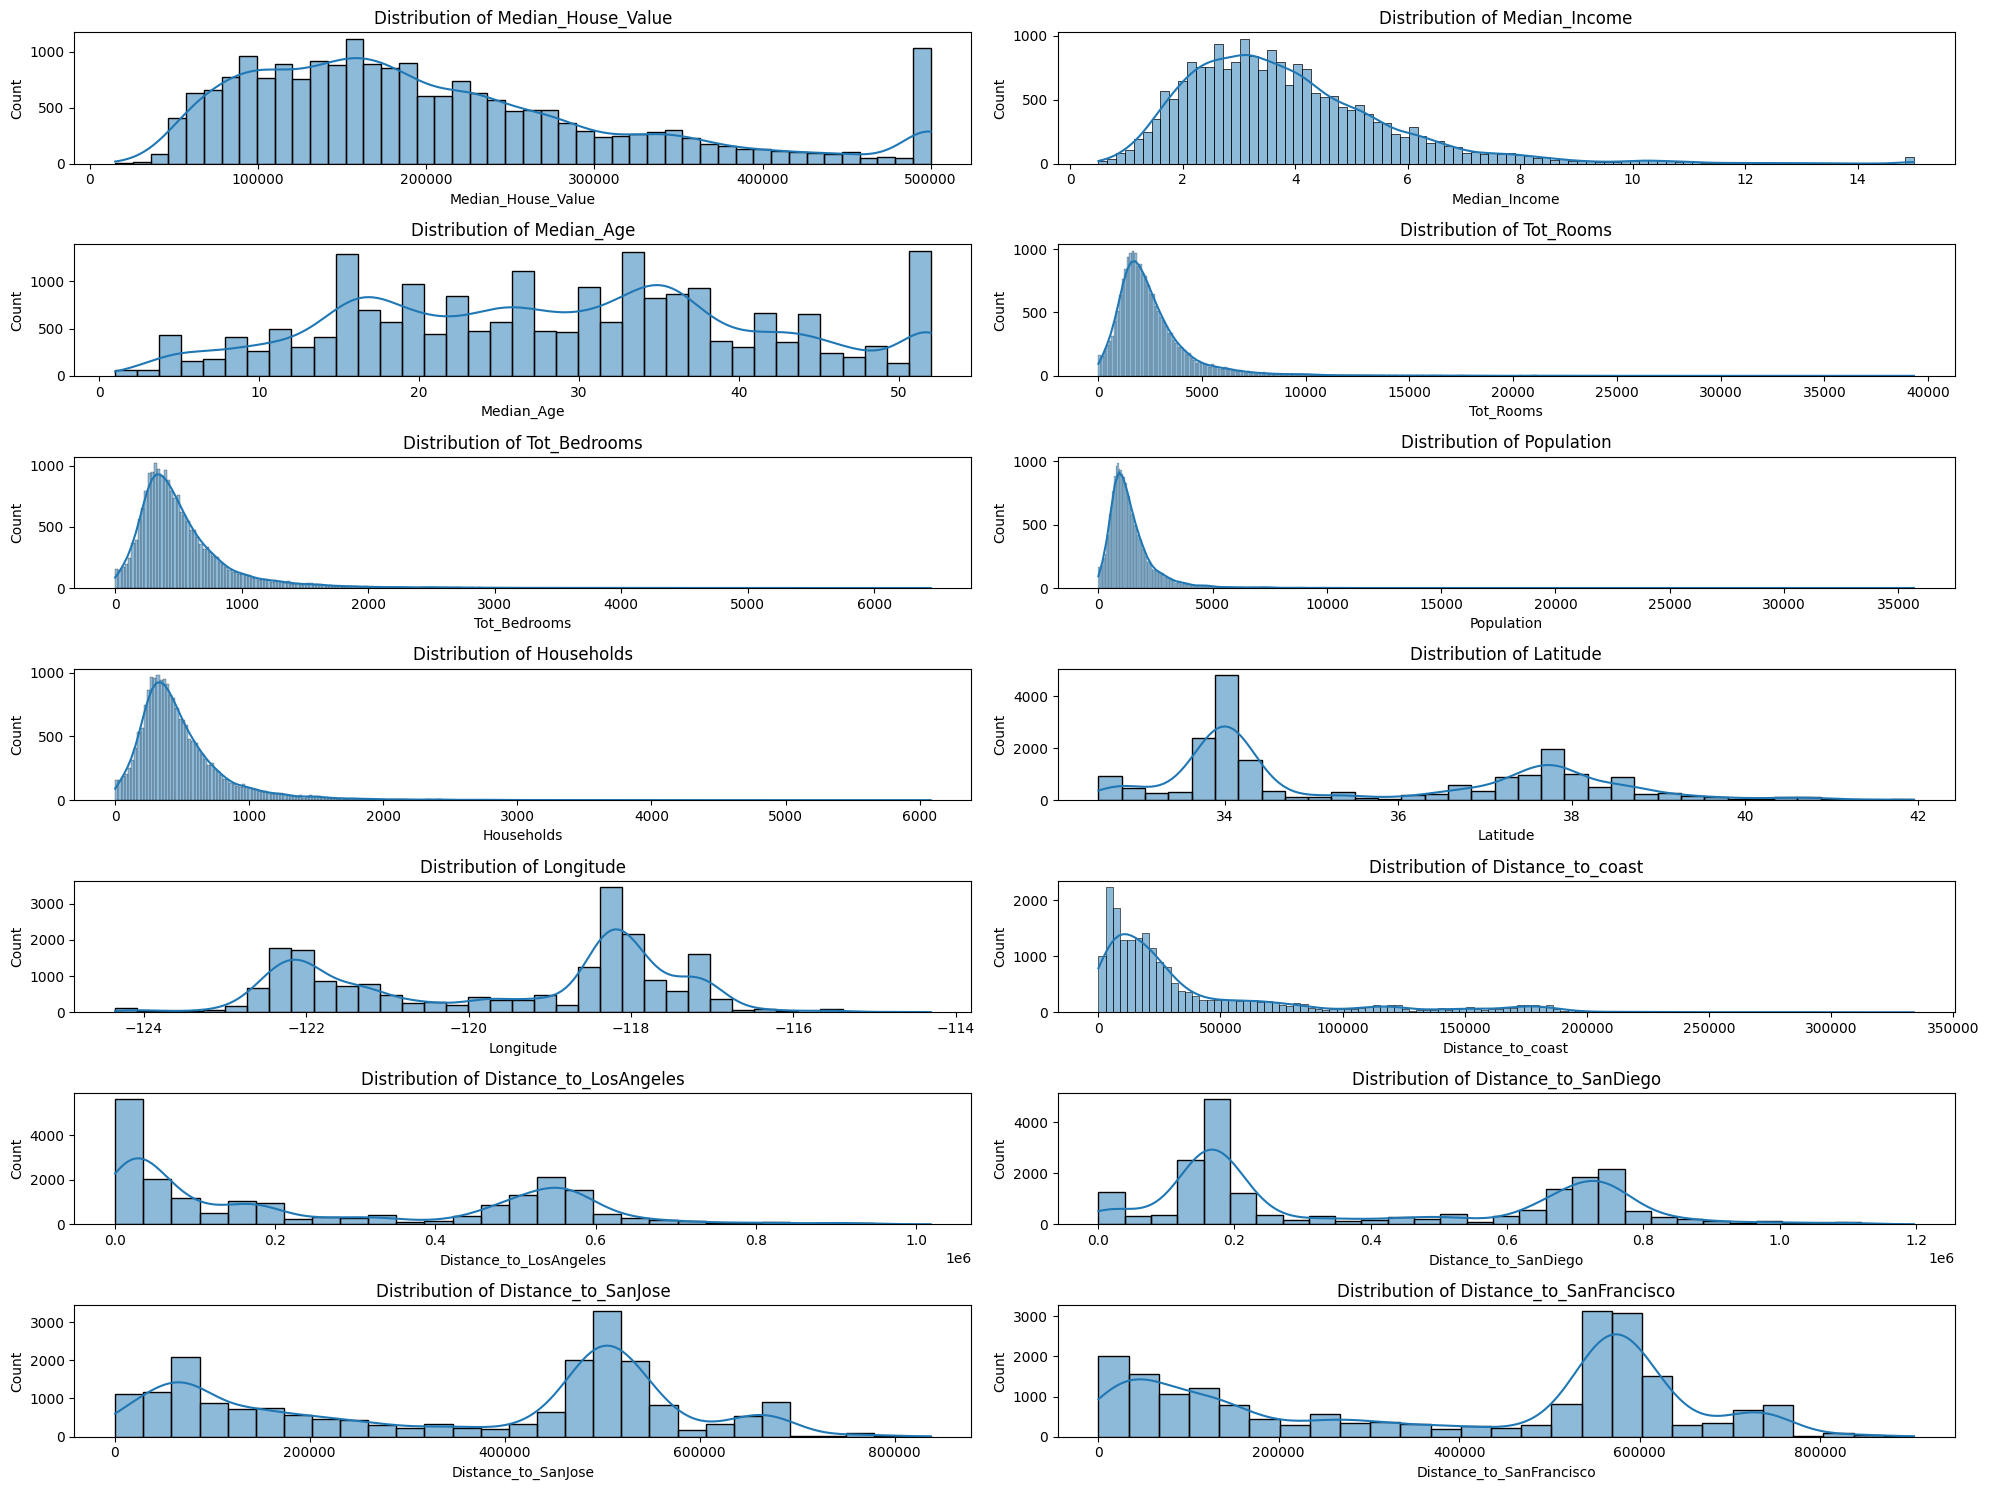

In [44]:
# Plot density plots for all variables in a single figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

If we take a look at the boxplot, for most of the columns we have a lot outliers using the IQR method. However, this is misleading as if we look at the density plots we can observe that we have multiple clusters at different value ranges. For example looking at `Median_House_Value`. 

Given that this is real data which makes sense in California in particular, there are people who have a very large income and can afford expensive housing. While conducting analysis and model building we can keep these in mind when considering the limitations of the analysis and the model.

### Correlation

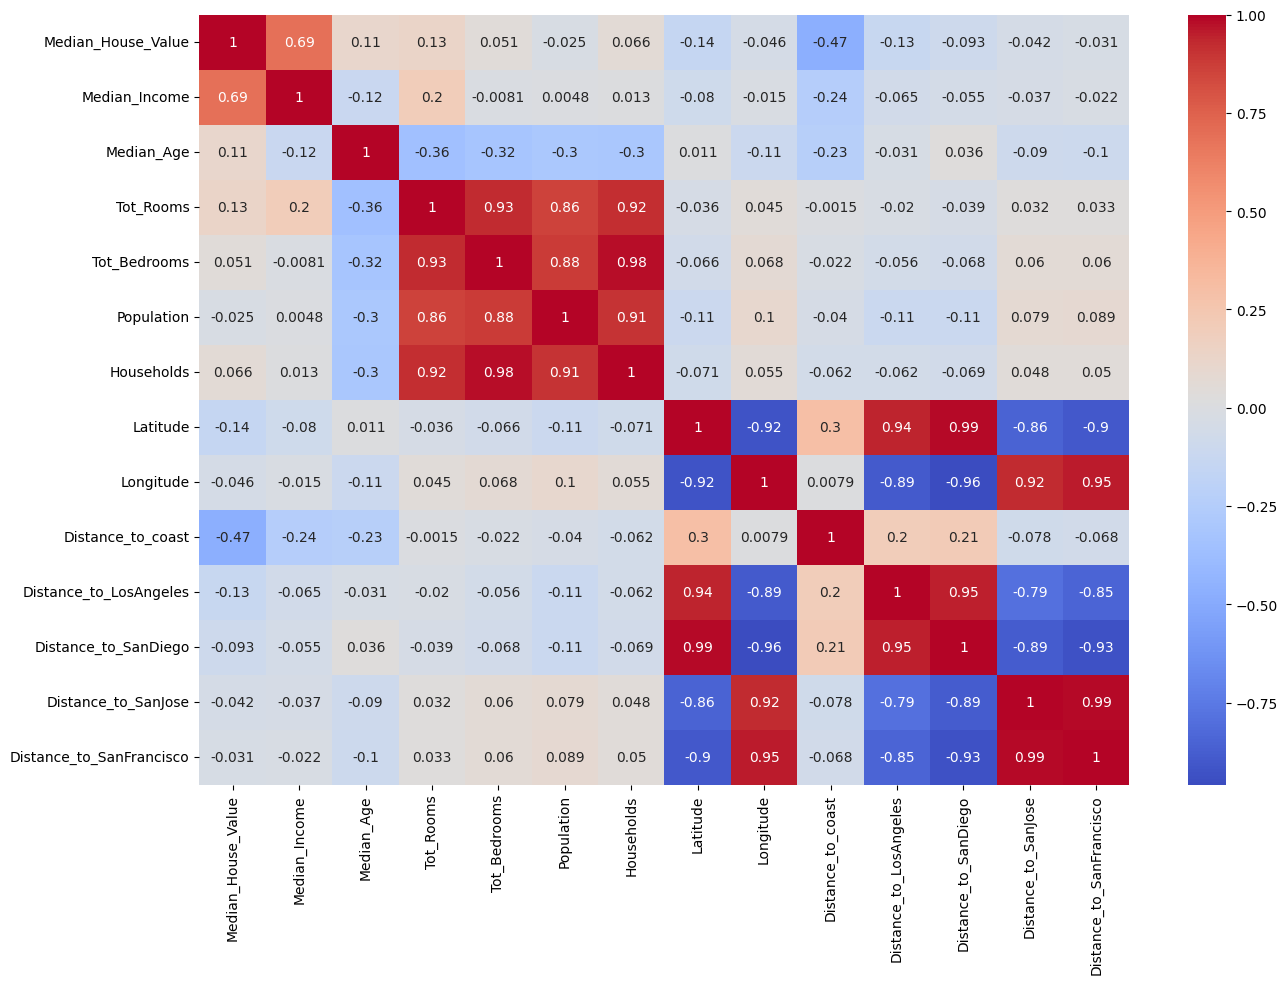

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### In the heatmap above, we can see that a lot of the variables are highly correlated.
- **Household, population, total rooms and total bedrooms** are highly correlated with each other. Therefore, we must do transform these columns to decrease multicollinearity. Linear regression perform poorly when multicollinearity is high, while the random forest is more robust and can handle multicollinearity better. As long as we do not lose information, we can still gain better prediction scores by transforming these highly correlated variables.

### Feature Engineering


In [46]:
# Extract the relevant columns
bedrooms_rooms = df[['Tot_Bedrooms', 'Tot_Rooms']]

# Standardize the data
scaler = StandardScaler()
bedrooms_rooms_scaled = scaler.fit_transform(bedrooms_rooms)

# Apply PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(bedrooms_rooms_scaled)

# Add the principal component back to the dataframe
df['Bedrooms_Rooms_block_PCA'] = principal_components

We combined `Tot_Bedrooms`, `Tot_Rooms` due to the fact that they are highly correlated 

In [47]:
df['Avg_Pop_Per_Household'] = df['Population'] / df['Households']
df.drop(columns=['Households', 'Tot_Bedrooms', 'Tot_Rooms'], inplace=True)

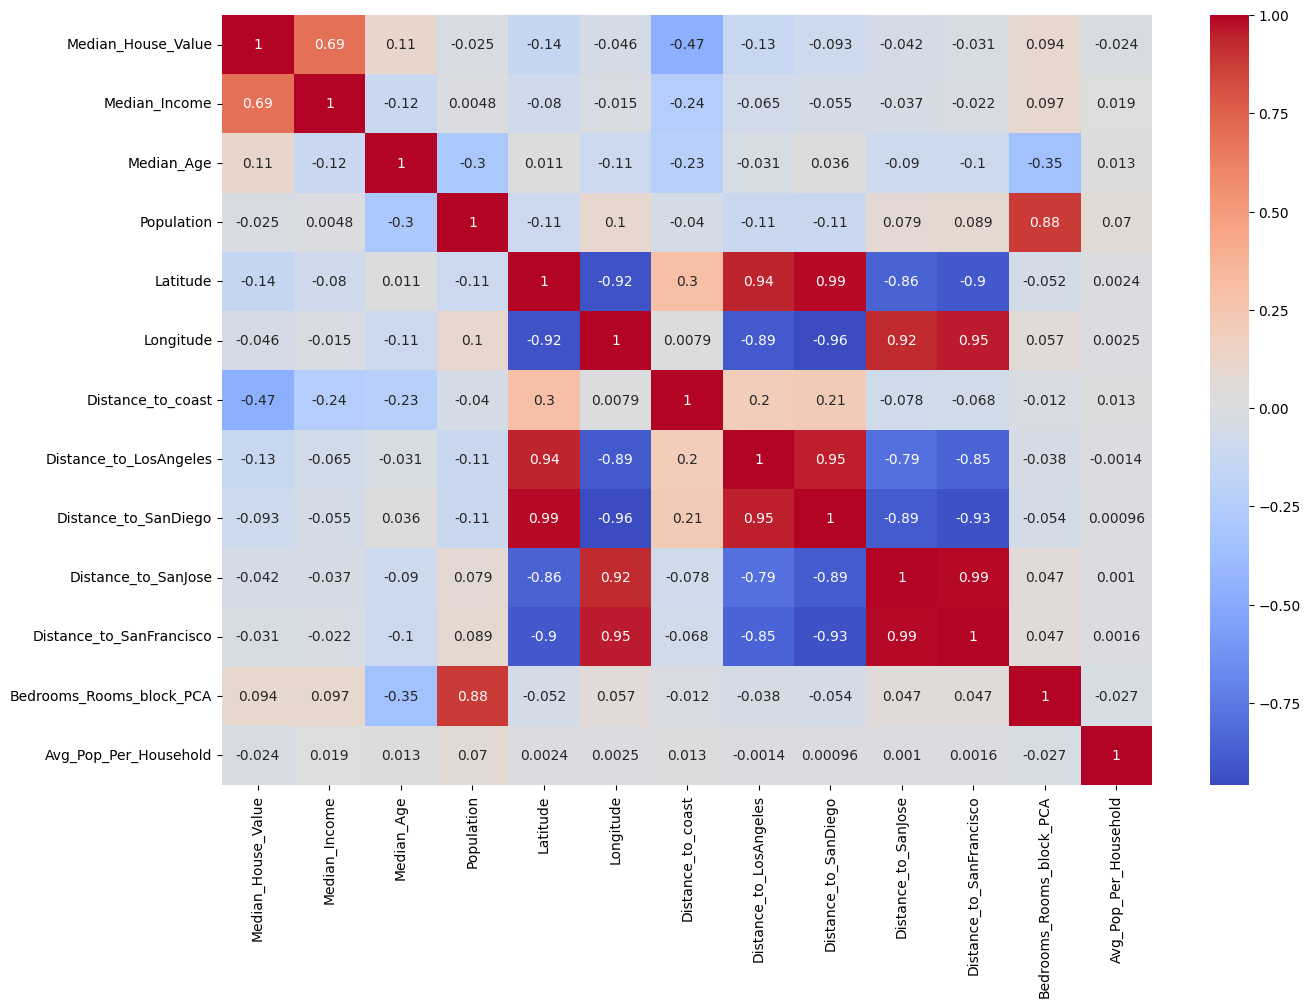

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Explanation of the new correlation matrix

We can see now that our previously hghly correlated features, do not show multicollinearity anymore. The only question arises, does our PCA that incorporates number of bedrooms and total rooms, still has a signficant relationship with house pricing. 

### Understanding of geographic data

Below we have located the longitude and latitude of the cities in our dataframe. A visualization is made of all the locations of the houses that are in the dataset on a map

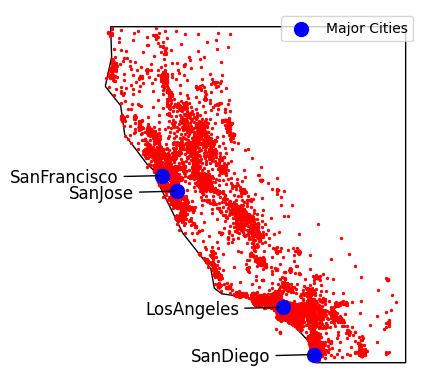

In [49]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

world = gpd.read_file(get_path("naturalearth.land"))

# Create a DataFrame for the cities with their coordinates
gdf_cities = gpd.GeoDataFrame({
    'City': ['SanJose', 'SanFrancisco', 'LosAngeles', 'SanDiego'],
    'Latitude': [37.3382, 37.7749, 34.0522, 32.7157],
    'Longitude': [-121.8863, -122.4194, -118.2437, -117.1611]
}, geometry=gpd.points_from_xy([-121.8863, -122.4194, -118.2437, -117.1611], [37.3382, 37.7749, 34.0522, 32.7157]), crs="EPSG:4326")

# Plot the cities on the map
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=2)
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o', label='Major Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

ax.axis('off')
plt.legend(loc='upper right')
plt.legend()
plt.show()

### Transforming highly correlated location data

Each row of data has a distance to each city, this is very impractical. Therefore the data of distance to each city is transformed two variables, the closest major city where the house is located nearby to and what this city is. 

In [50]:
# Create new Closest City column for Los Angeles and San Francisco San Jose and San Diego using distance columns
df['Closest_Distance_to_city'] = df[[column for column in df.columns if column.startswith('Distance_')]].min(axis=1)

df['Closest_Distance_to_city'] = df[['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']].min(axis=1)

df['Closest_City'] = np.where(df['Distance_to_LosAngeles'] == df['Closest_Distance_to_city'], 'LosAngeles',
                     np.where(df['Distance_to_SanDiego'] == df['Closest_Distance_to_city'], 'SanDiego',
                     np.where(df['Distance_to_SanJose'] == df['Closest_Distance_to_city'], 'SanJose', 'SanFrancisco')))

df.drop(columns=['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace=True)

### New map visualization with newly engineered features  

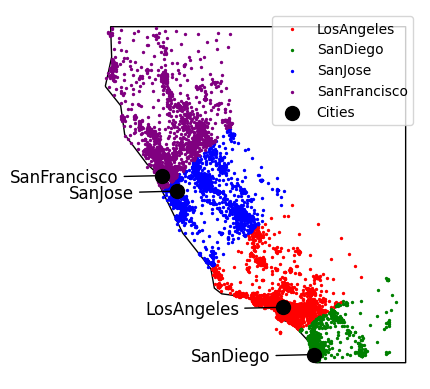

In [51]:
# Define colors for each city
colors = {'LosAngeles': 'red', 'SanDiego': 'green', 'SanJose': 'blue', 'SanFrancisco': 'purple'}

# Create a GeoDataFrame for the points with the closest city
gdf['Closest_City'] = df['Closest_City']

# Plot the world map restricted to California
ax = world.clip([-130, 32.5, -114, 42]).plot(color="white", edgecolor="black")

# Plot the points colored by the closest city
for city, color in colors.items():
    gdf[gdf['Closest_City'] == city].plot(ax=ax, color=color, markersize=2, label=city)

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="black", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
    textcoords='data', fontsize=12, ha='right',
    arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

### Relating the data distribution to the closest city

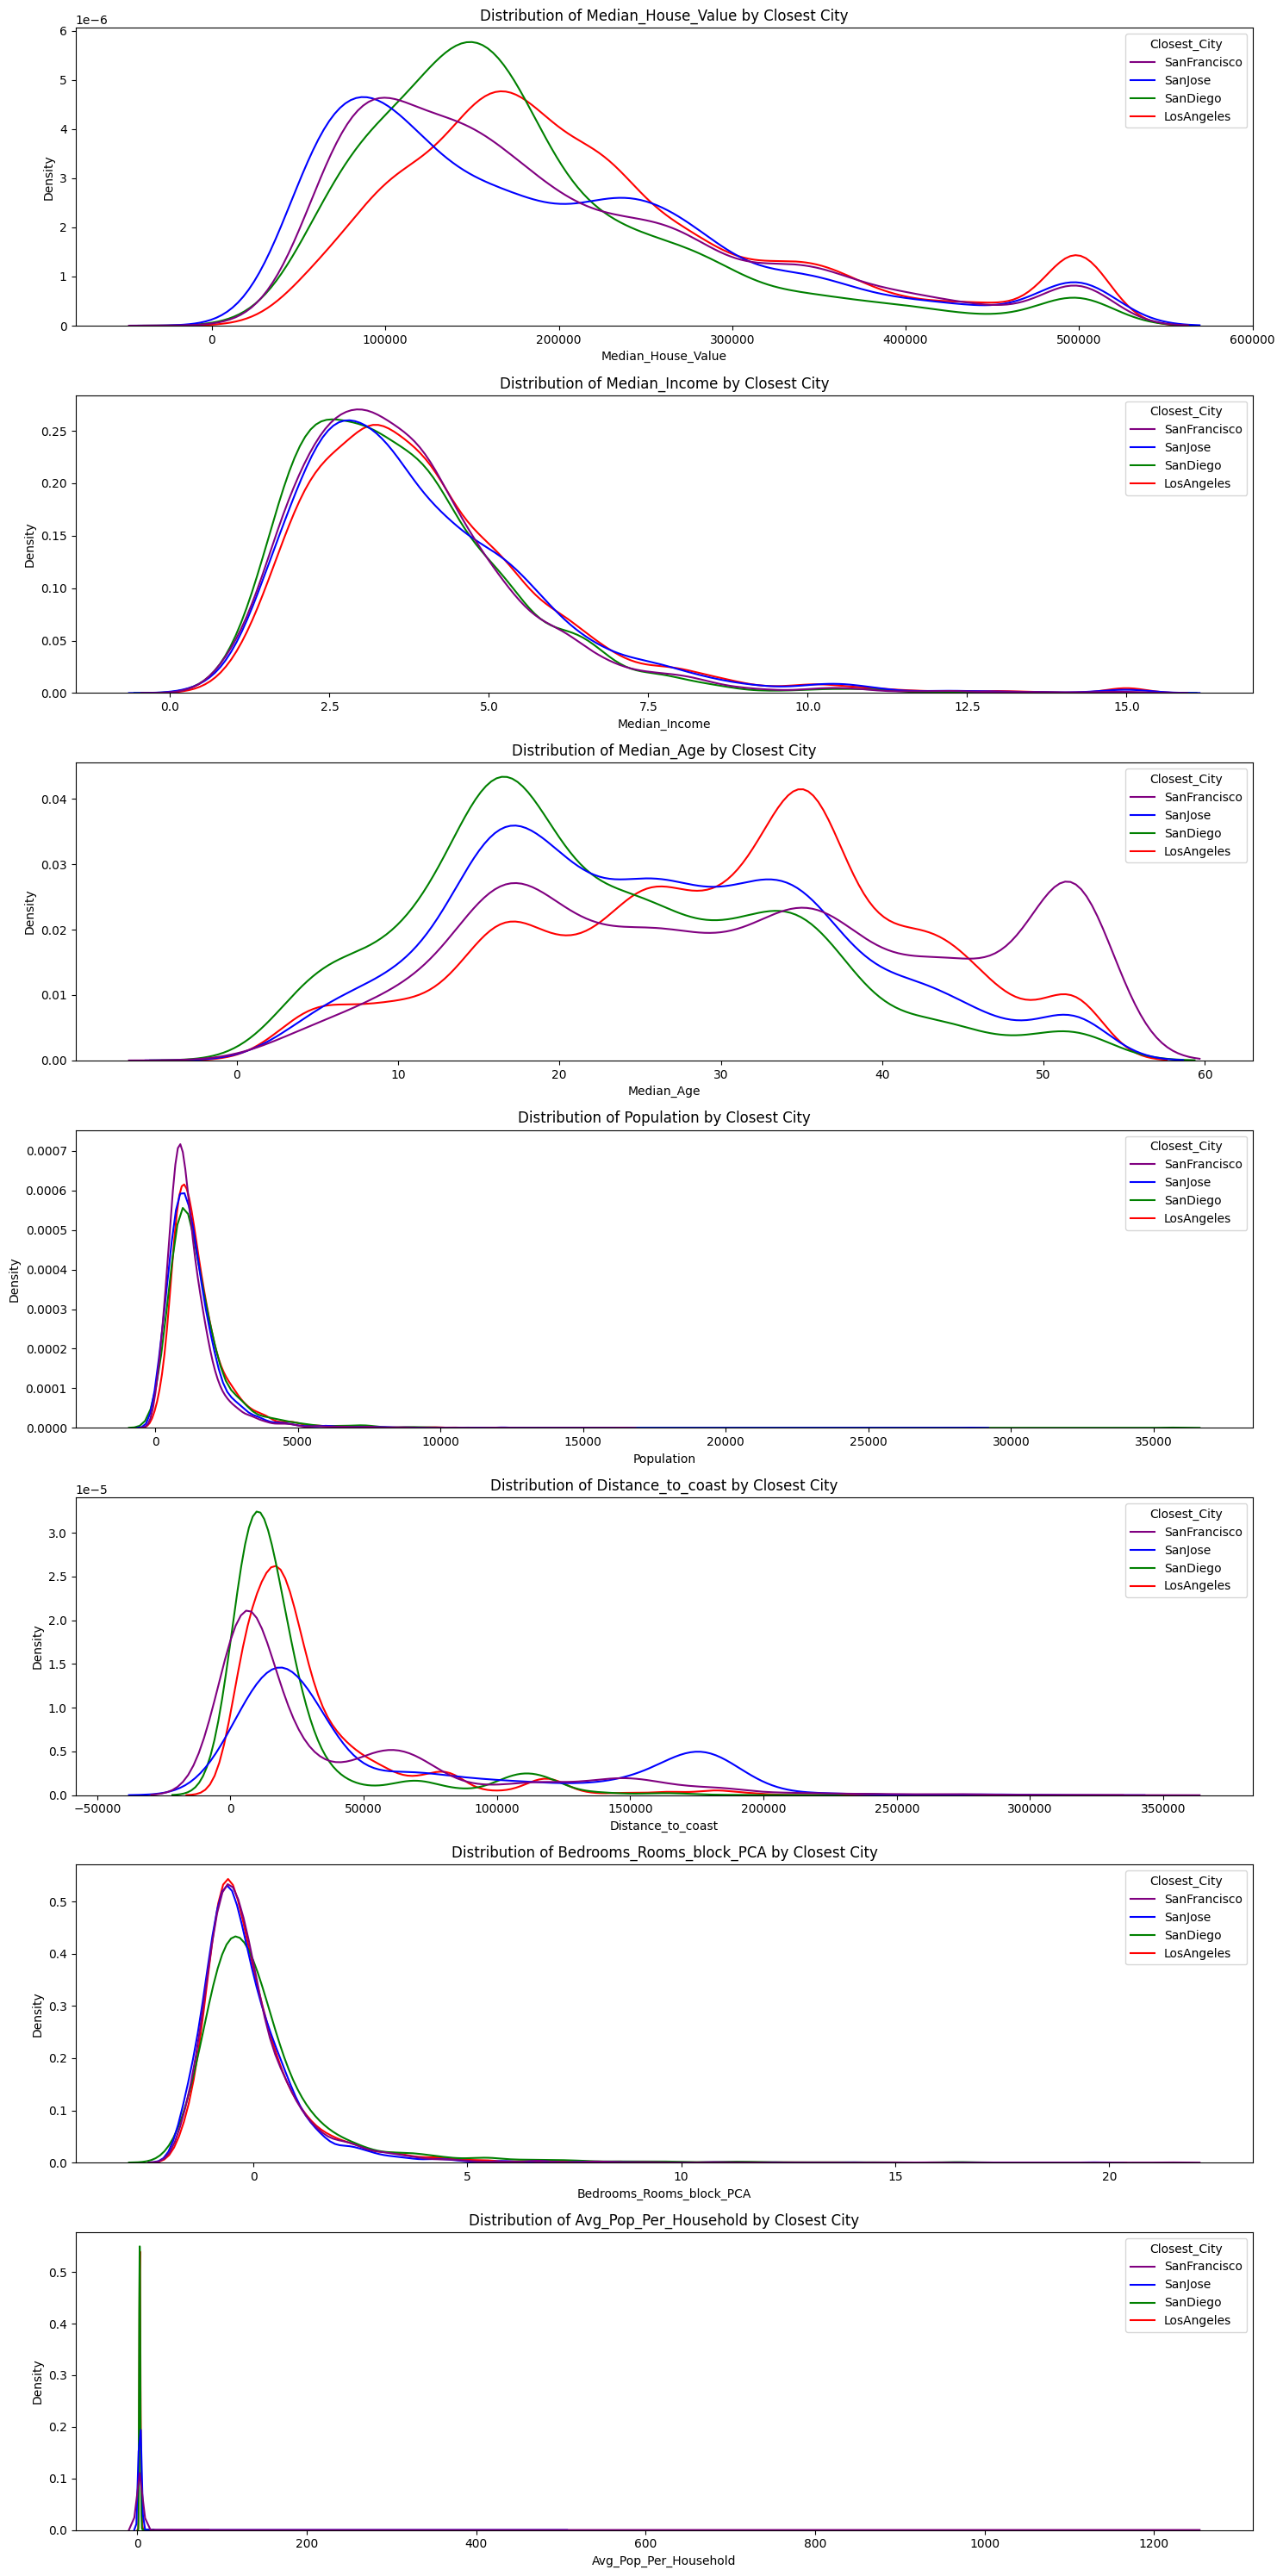

In [52]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude',
                                                            'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                            'Closest_Distance_to_city', 'Closest_City']]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=col, hue='Closest_City', common_norm=False, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Closest City')

plt.tight_layout()
plt.show()

### Normalization and scaling step

Previously the number of rooms and bedrooms has been transformed to a PCA, which is a normalization step. It is still to be decided if normalization steps have to be taken for the rest of the data

The cities are currently a categorical variable, which must be transformed to a dummy variable so that the model can make use of the data

In [53]:
def transform_categorical_string_column_into_dummies(dataframe, column):
    if column not in dataframe:
        return dataframe
    onehot_df = pd.get_dummies(dataframe, columns=[column])
    return onehot_df

df = transform_categorical_string_column_into_dummies(df, "Closest_City")
df

,Median_House_Value,Median_Income,Median_Age,Population,Latitude,Longitude,Distance_to_coast,Bedrooms_Rooms_block_PCA,Avg_Pop_Per_Household,Closest_Distance_to_city,Closest_City_LosAngeles,Closest_City_SanDiego,Closest_City_SanFrancisco,Closest_City_SanJose
0,452600.0,8.3252,41,322,37.88,-122.23,9263.040773,-1.255486,2.555556,21250.213767,False,False,True,False
1,358500.0,8.3014,21,2401,37.86,-122.22,10225.733072,2.400302,2.109842,20880.600400,False,False,True,False
2,352100.0,7.2574,52,496,37.85,-122.24,8259.085109,-0.962825,2.802260,18811.487450,False,False,True,False
3,341300.0,5.6431,52,558,37.85,-122.25,7768.086571,-0.949843,2.547945,18031.047568,False,False,True,False
4,342200.0,3.8462,52,565,37.85,-122.25,7768.086571,-0.759887,2.181467,18031.047568,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,845,39.48,-121.09,162031.481121,-0.589778,2.560606,222619.890417,False,False,True,False
20636,77100.0,2.5568,18,356,39.49,-121.21,160445.433537,-1.279550,3.122807,218314.424634,False,False,True,False
20637,92300.0,1.7000,17,1007,39.43,-121.22,153754.341182,-0.212537,2.325635,212097.936232,False,False,True,False
20638,84700.0,1.8672,18,741,39.43,-121.32,152005.022239,-0.467820,2.123209,207923.199166,False,False,True,False


# Modelling

## Regression Models

### Linear Regression:
Below the data is splitted into the dependend variable (Y) and the independent variables (X). 
Then the data is split into a train and test set with 80% in train and 20% in test.

Then the data is scaled using a standard scaler. After scaling the data, the Linear Regression is trained without specifying any hyperparameters. Below the code block, the mean squared error is shown that was created after the prediction and evaluation of the prediction using the test set

In [54]:
# Select the features and target variable
X = df.drop(columns=["Median_House_Value", "Latitude", "Longitude"])
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

Mean Squared Error: 5172953824.488757
Coefficients: [ 6.67109894e+04  1.31540219e+04 -4.28369335e+04 -2.85019201e+04
  4.66565530e+04  6.34051664e+02 -1.21662888e+04  7.79355400e+16
  4.59495963e+16  6.71949037e+16  6.04430538e+16]
Intercept: 207193.3104700999


In [55]:
# Summary of the linear regression model
print("Linear Regression Model Summary")
print("--------------------------------")
print(f"Intercept: {linear_model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"  {feature}: {coef}")

# Calculate and print R-squared
r_squared_OLS = linear_model.score(X_test_scaled, y_test)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r_squared_OLS}")

Linear Regression Model Summary
--------------------------------
Intercept: 207193.3104700999
Coefficients:
  Median_Income: 66710.98942336609
  Median_Age: 13154.02185867818
  Population: -42836.9335176111
  Distance_to_coast: -28501.920115052304
  Bedrooms_Rooms_block_PCA: 46656.552962091824
  Avg_Pop_Per_Household: 634.0516643872348
  Closest_Distance_to_city: -12166.288833936593
  Closest_City_LosAngeles: 7.793554004736837e+16
  Closest_City_SanDiego: 4.594959633594904e+16
  Closest_City_SanFrancisco: 6.71949037332722e+16
  Closest_City_SanJose: 6.044305379270929e+16

Mean Squared Error: 5172953824.488757
R-squared: 0.6052412712073326


### Explanation of results of linear model

The R-squared is 0.6, which is a very good score, in a different variation of the model where we did not incorporate the dummy variables and PCA of rooms, we got an R-squared of 0.5. Therefore it seems that our transformations have had a positive impact on the results of our metrics

### Visualize the statistics of the linear regression model



In [56]:
X_train_scaled

array([[-0.326196  ,  0.34849025,  0.76827628, ...,  3.07096525,
        -0.57082317, -0.47445504],
       [-0.03584338,  1.61811813, -0.09890135, ..., -0.32563052,
        -0.57082317, -0.47445504],
       [ 0.14470145, -1.95271028, -0.44981806, ..., -0.32563052,
        -0.57082317, -0.47445504],
       ...,
       [-0.49697313,  0.58654547,  0.28983345, ..., -0.32563052,
        -0.57082317, -0.47445504],
       [ 0.96545045, -1.07984112,  0.30830275, ..., -0.32563052,
        -0.57082317,  2.10768128],
       [-0.68544764,  1.85617335,  1.04883375, ..., -0.32563052,
         1.75185602, -0.47445504]])

In [57]:
# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2758.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:33:11   Log-Likelihood:            -2.0782e+05
No. Observations:               16512   AIC:                         4.157e+05
Df Residuals:                   16501   BIC:                         4.157e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    550.691    376.245      0.000    2.06e+05    2.08e+05
x1          6.672e+04    603.889    110.479      0.000    6.55e+04    6.79e+04
x2          1.315e+04    648.193     20.292      0.000    1.19e+04    1.44e+04
x3         -4.279e+04   1263.491    -33.869      0.000   -4.53e+04   -4.03e+04
x4         -2.846e+04    851.984    -33.408      0.000   -3.01e+04   -2.68e+04
x5          4.663e+04   1271.083     36.683      0.000    4.41e+04    4.91e+04
x6           656.6353    565.713      1.161      0.246    -452.222    1765.493
x7         -1.219e+04    888.080    -13.729      0.000   -1.39e+04   -1.05e+04
x8          3151.4818    361.208      8.725      0.000    2443.476    3859.488
x9         -7530.5790    499.203    -15.085      0.000   -8509.071   -6552.087
x10        -1811.6523    428.076     -4.232      0.000   -2650.728    -972.577
x11         3675.3344    447.225      8.218      0.000    2798.726    4551.943
==============================================================================
Omnibus:                     3994.263   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13301.239
Skew:                           1.214   Prob(JB):                         0.00
Kurtosis:                       6.666   Cond. No.                     2.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Explanation of statiscal test above
All the variables are statistically significant except for the 6th variable (x6). Which is the distance to the nearest city called "Closest_Distance_to_city"

In [58]:
X_train.iloc[:, 6]

14196     12280.841509
8267      32319.244177
17445    216117.671544
14265      5571.282372
2271     195724.414620
             ...      
11284     40019.707560
11964     75062.702751
5390      12801.292905
860       27824.577268
15795      1086.741962
Name: Closest_Distance_to_city, Length: 16512, dtype: float64

TODO:

Explain below the graphs

R-squared Linear regression: 0.6052412712073326


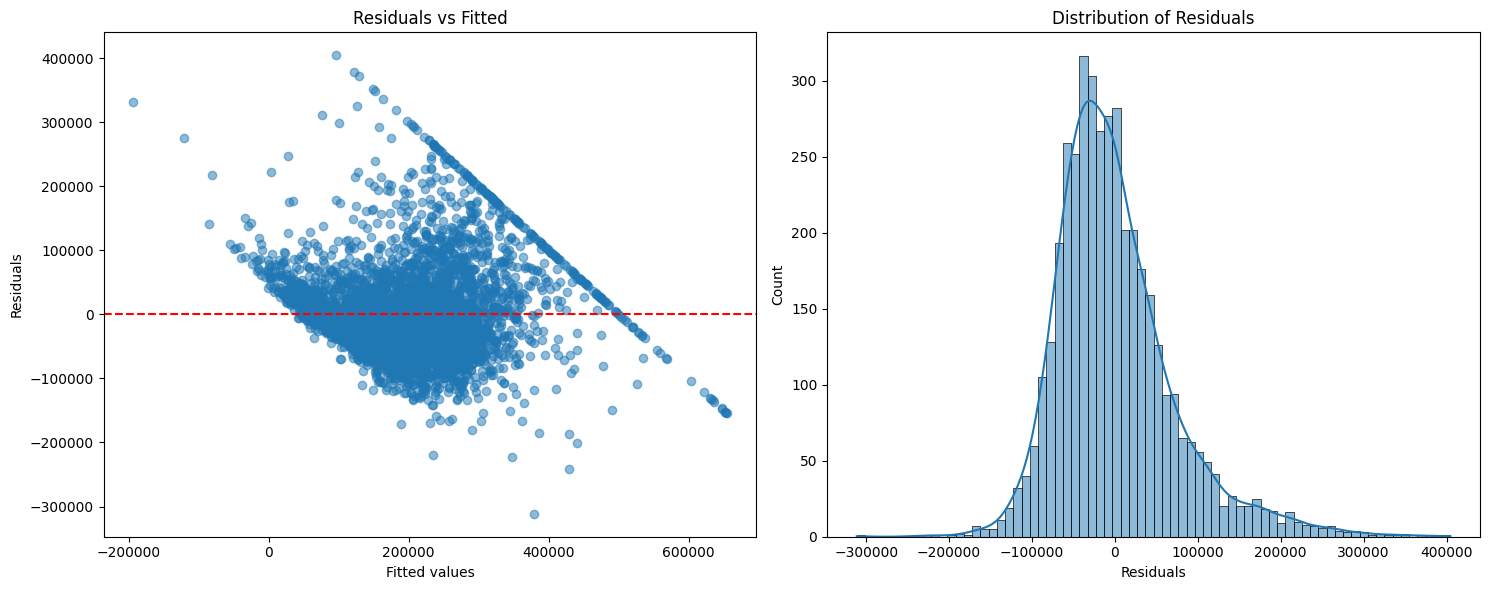

In [59]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(15, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()

# Calculate and print R-squared
r_squared_OLS = r2_score(y_test, y_pred)
print(f'R-squared Linear regression: {r_squared_OLS}')
plt.show()

The distribution of the residuals is normally distributed, which is one of the requirements for OLS.

# :TODO
- Explain the left picture Residuals vs Fitted

## Random Forest Regression

# :TODO
- This makes no sense we must change and add information because right now it is useless

In [60]:

# Create and fit the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Print the feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

r_squared_RF = r2_score(y_test, y_pred_rf)
print(f'R-squared Random Forest Regressor : {r_squared_RF}')

Mean Squared Error (Random Forest): 2811881843.9717712
                      Feature  Importance
0               Median_Income    0.491436
3           Distance_to_coast    0.190110
5       Avg_Pop_Per_Household    0.130163
6    Closest_Distance_to_city    0.065168
1                  Median_Age    0.044545
4    Bedrooms_Rooms_block_PCA    0.027130
2                  Population    0.025012
7     Closest_City_LosAngeles    0.010468
8       Closest_City_SanDiego    0.006428
9   Closest_City_SanFrancisco    0.005762
10       Closest_City_SanJose    0.003778
R-squared Random Forest Regressor : 0.785419522403879


# Model Comparison - OLS vs RFR

In this section, the comparison between the models will be made.

In [61]:


# Calculate Mean Squared Error (MSE) for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')

# Calculate Mean Absolute Percentage Error (MAPE) for Linear Regression
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (Linear Regression): {mape_lr}')

# Fit the model using statsmodels to get AIC and BIC
X_test_const = sm.add_constant(X_test_scaled)
model_sm = sm.OLS(y_test, X_test_const).fit()

# AIC and BIC calculation
aic_lr = model_sm.aic
bic_lr = model_sm.bic
print(f'AIC (Linear Regression): {aic_lr}')
print(f'BIC (Linear Regression): {bic_lr}')


Mean Squared Error (Linear Regression): 5172953824.488757
Mean Absolute Percentage Error (Linear Regression): 0.31851103215752957
AIC (Linear Regression): 104054.54437060714
BIC (Linear Regression): 104124.12540198592


In [62]:
# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'Mean Absolute Percentage Error (Random Forest): {mape_rf}')

# Calculate AIC and BIC
n = len(y_test)
p = X_test.shape[1]

# AIC calculation
aic_rf = n * np.log(mse_rf) + 2 * p
print(f'AIC (Random Forest): {aic_rf}')

# BIC calculation
bic_rf = n * np.log(mse_rf) + p * np.log(n)
print(f'BIC (Random Forest): {bic_rf}')

Mean Squared Error (Random Forest): 2811881843.9717712
Mean Absolute Percentage Error (Random Forest): 0.19454103459802954
AIC (Random Forest): 89835.3904993525
BIC (Random Forest): 89904.97153073129


TODO!!!!!!!!
Why do we compare the models RMSE values instead of something else, and what is the conclusion of this?

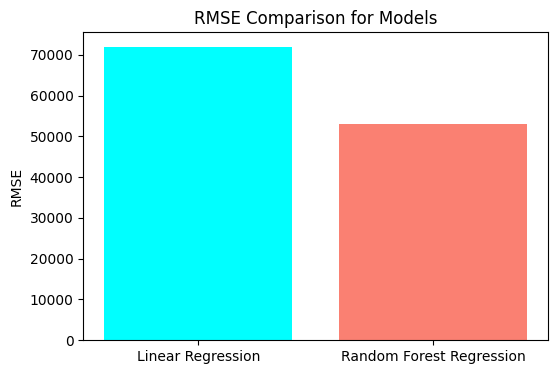

In [63]:
models = ['Linear Regression', 'Random Forest Regression']
mse_values = [np.sqrt(mse_lr), np.sqrt(mse_rf)]
#r2_values = [r2_lr, r2_ridge, r2_lasso]
mape_values = [mape_lr, mape_rf]

plt.figure(figsize=(6, 4))
plt.bar(models, mse_values, color=['cyan', 'salmon'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Models')
plt.show()

TODO!!!!!!
What is this 3 code blocks below??? Mehdi and Berkay did not check yet.

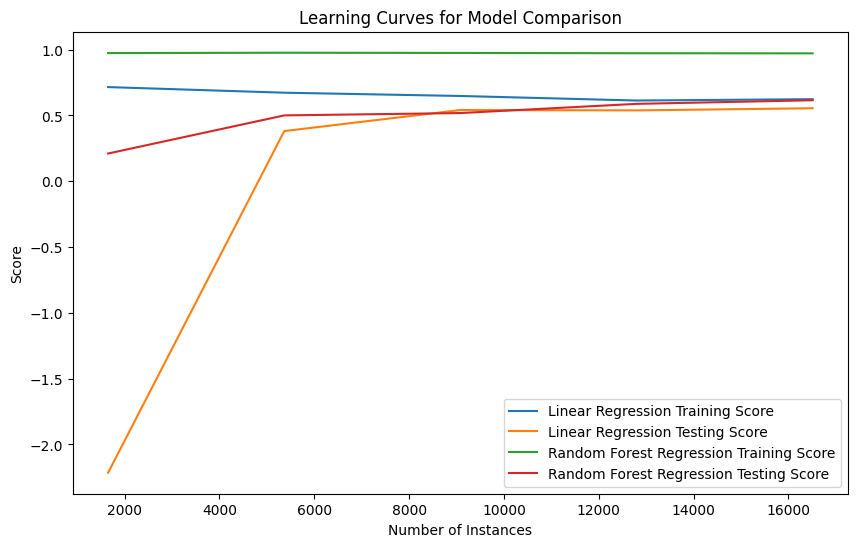

In [64]:
train_size, train_scores1, test_scores1 = learning_curve(linear_model, X, y, cv=5)
train_size, train_scores2, test_scores2 = learning_curve(rf_model, X, y, cv=5)
plt.figure(figsize=(10, 6))
plt.plot(train_size, np.mean(train_scores1, axis=1), label='Linear Regression Training Score')
plt.plot(train_size, np.mean(test_scores1, axis=1), label='Linear Regression Testing Score')
plt.plot(train_size, np.mean(train_scores2, axis=1), label='Random Forest Regression Training Score')
plt.plot(train_size, np.mean(test_scores2, axis=1), label='Random Forest Regression Testing Score')
plt.xlabel('Number of Instances')
plt.ylabel('Score')
plt.title('Learning Curves for Model Comparison')
plt.legend()
plt.show()

In [65]:
# Generate predictions for each tree in the Random Forest
all_tree_predictions = np.array([tree.predict(X_test) for tree in rf_model.estimators_])

# Calculate the prediction interval (e.g., 95% prediction interval)
lower_bound = np.percentile(all_tree_predictions, 2.5, axis=0)
upper_bound = np.percentile(all_tree_predictions, 97.5, axis=0)

# Calculate the percentage of the actual test data that falls within the interval
within_interval = np.mean((y_test >= lower_bound) & (y_test <= upper_bound)) * 100

print(f'Percentage of test data within the 95% prediction interval: {within_interval:.2f}%')

Percentage of test data within the 95% prediction interval: 56.83%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegre

In [66]:
# Generate predictions for the linear regression model
y_pred_lr = linear_model.predict(X_test_scaled)

# Calculate the prediction intervals using np.percentile
lower_bound_lr = np.percentile(y_pred_lr, 2.5)
upper_bound_lr = np.percentile(y_pred_lr, 97.5)

# Calculate the percentage of the actual test data that falls within the interval
within_interval_lr = np.mean((y_test >= lower_bound_lr) & (y_test <= upper_bound_lr)) * 100

print(f'Percentage of test data within the 95% prediction interval (Linear Regression): {within_interval_lr:.2f}%')

Percentage of test data within the 95% prediction interval (Linear Regression): 91.91%


:TODO!!!!!!!!!
- We need to make a final conclusion where we compare both the models.
- Final reflection is needed where we explain how the models could be improved, For example adding new data, hyperparameter tuning.


# Bibliography

Williams, A. K. (2000). The long wait: The critical shortage of housing in California. Housing California.